Bagging与随机森林之三
===

# 5.使用随机森林算法对鸢尾花数据进行分类

{'max_depth': 2, 'n_estimators': 100}
{'max_depth': 8, 'n_estimators': 100}
{'max_depth': 2, 'n_estimators': 200}
{'max_depth': 5, 'n_estimators': 10}
{'max_depth': 4, 'n_estimators': 200}
{'max_depth': 3, 'n_estimators': 10}


Text(0.5, 0.98, '随机森林对鸢尾花数据的两特征组合的分类结果')

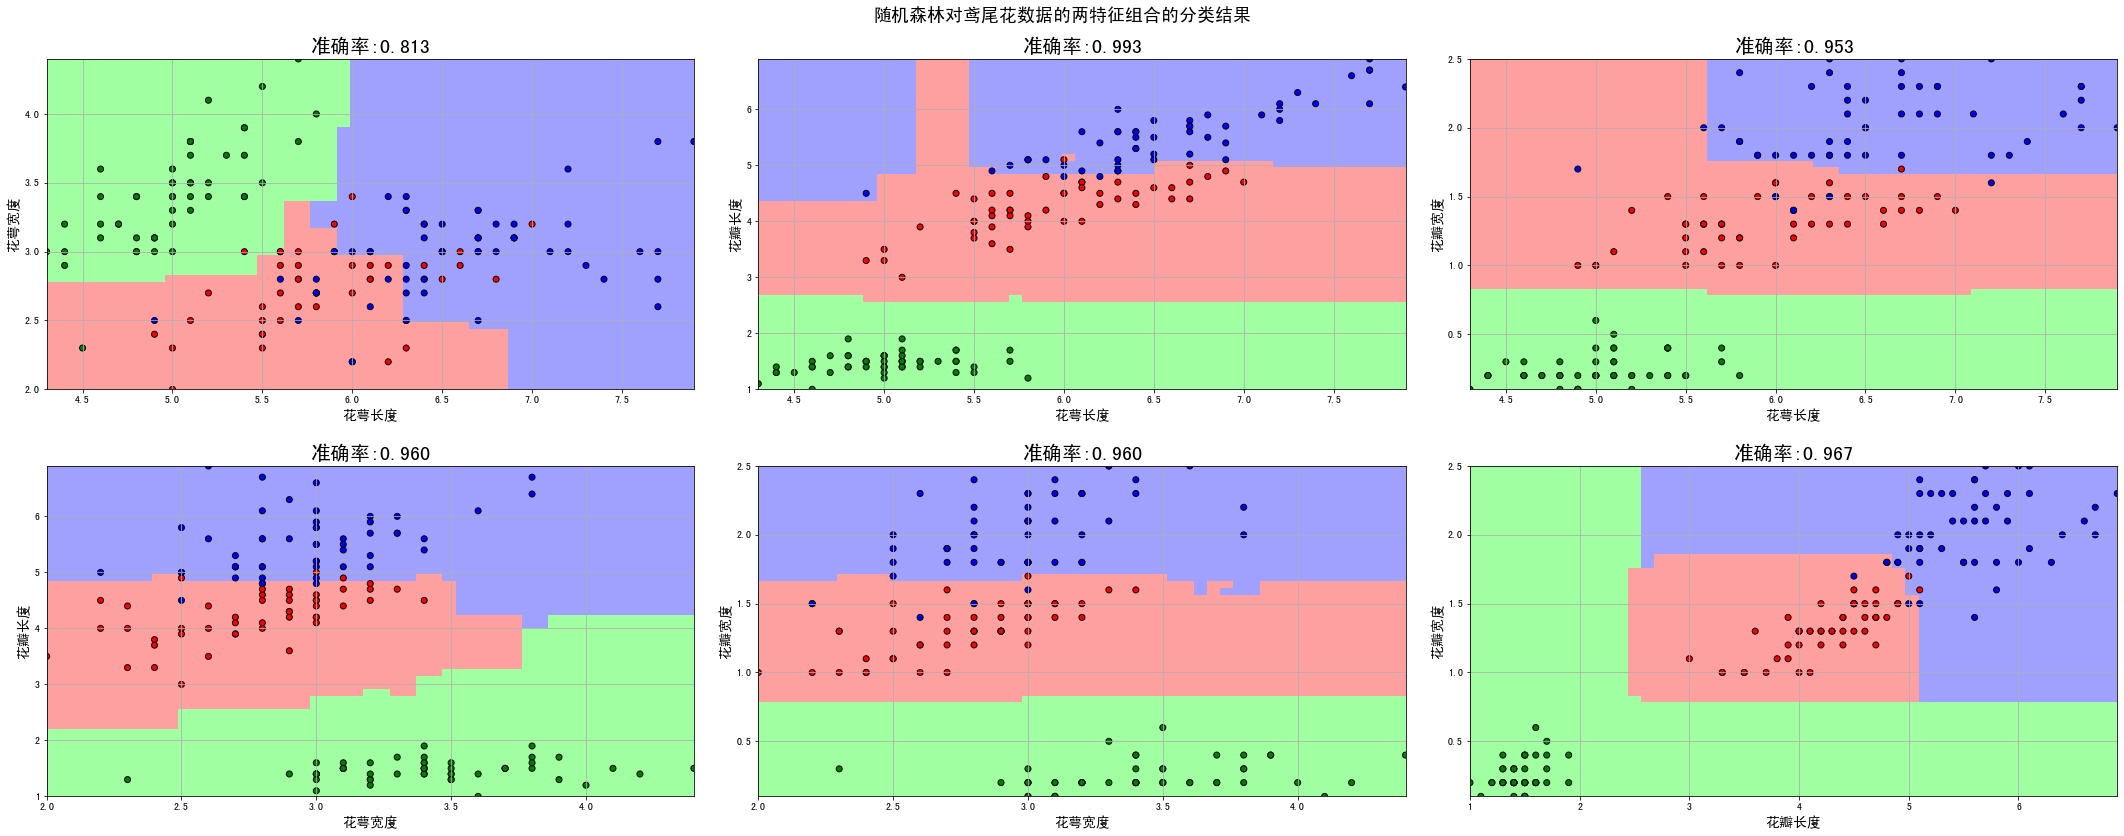

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import os

data_path = os.path.join("data")


def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]


iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv(os.path.join(data_path, "iris.data"), header=None)
x_prime = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(30, 12), facecolor='w')

max_depth = np.arange(1, 10)
n_estimators = [1, 10, 100, 200, 300]
params_list = dict(max_depth = max_depth, n_estimators = n_estimators)
cv = StratifiedKFold(4)
cv.get_n_splits(x_prime, y)
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[pair]

    # 随机森林
    clf = GridSearchCV(RandomForestClassifier(criterion='entropy'), param_grid=params_list, cv=cv)
    clf.fit(x, y.ravel())

    # 画图
    N, M = 50, 50  # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = clf.predict(x)
    print(clf.best_params_)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.title('准确率:%.3f' % clf.score(x, y),fontsize=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.tight_layout(2.5)
plt.subplots_adjust(top=0.92)
plt.suptitle(u'随机森林对鸢尾花数据的两特征组合的分类结果', fontsize=18)